# Deep Neural Network

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naiwen1997/IDNE-577-Machine-Learning/blob/master/Supervised%20Learning/Parametric%20Modeling/Lecture%203%20Single%20Neuron%20Logistic%20Regression/Logistic_Regression.ipynb)

In [2]:
#!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist # get the data

# Use the keras module to import the necessary data 
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [7]:
print(f"The shape of train_X is {train_X.shape}")
print(f"The shape of test_X is {test_X.shape}")
print(f"train_X[0] is {train_X[0]}")
print(f"test_X[0] is {test_X[0]}")

The shape of train_X is (60000, 28, 28)
The shape of test_X is (10000, 28, 28)
train_X[0] is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 

In [8]:
print(f"The shape of train_y is {train_y.shape}")
print(f"The shape of test_y is {test_y.shape}")
print(f"train_y[0] is {train_y[0]}")
print(f"test_y[0] is {test_y[0]}")

The shape of train_y is (60000,)
The shape of test_y is (10000,)
train_y[0] is 9
test_y[0] is 9


In [10]:
# Normalize the data
print(train_X.max(),test_X.max())

255 255


In [11]:
# Normalize the data
train_X=train_X/255
test_X=test_X/255

In [15]:
#get the category of fashion
print(np.unique(train_y))
# Define class names as given in Fashion MNIST data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

[0 1 2 3 4 5 6 7 8 9]


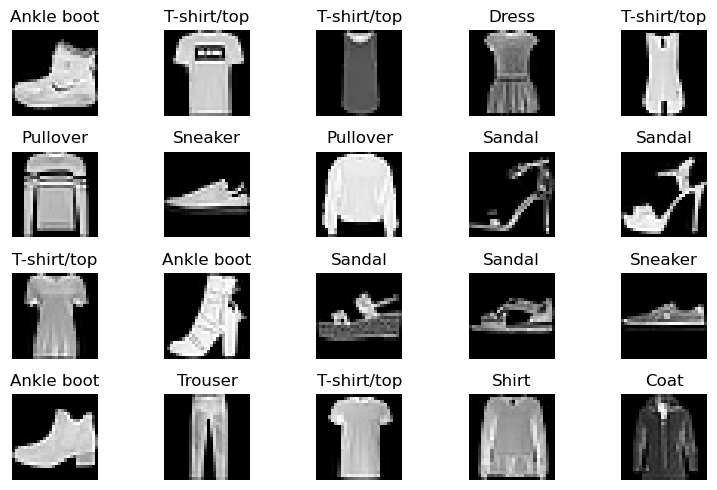

In [25]:
# Plot some examples from the dataset
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(8, 5))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(train_X[i], cmap='gray')
    axes[i].set_title(class_names[train_y[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

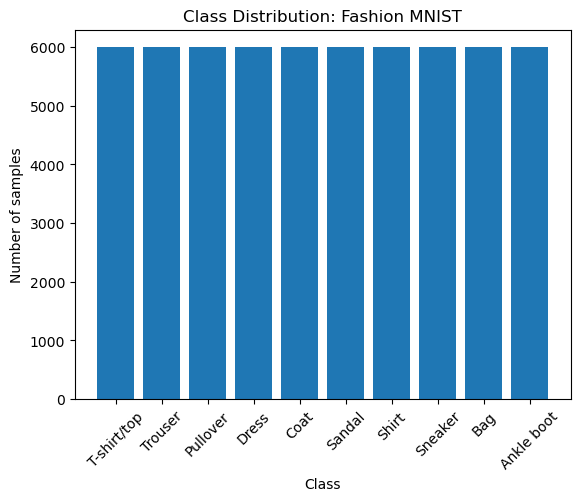

In [27]:
# Count the number of samples in each class
class_counts = np.bincount(train_y)
# Plot a bar chart of the class distribution
plt.bar(range(len(class_names)), class_counts)
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution: Fashion MNIST')
plt.show()

In [35]:
# flatten the data
flat_train_X=[]
onehot_train_y=[]

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.reshape(784,1))
    temp_vec=np.zeros((10,1))
    temp_vec[y][0]=1
    onehot_train_y.append(temp_vec)

flat_test_X=[]
onehot_test_y=[]

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.reshape(784,1))
    temp_vec=np.zeros((10,1))
    temp_vec[y][0]=1
    onehot_test_y.append(temp_vec)


In [36]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

In [37]:
def initialize_weights(layers = [784, 60, 60, 10]):
    # The following Python lists will contain numpy matrices
    # connected the layers in the neural network 
    W = [[0.0]] # use a placeholder for position 0 to let index align with the layer indexing in the loop where i starts from 1. 
    B = [[0.0]] 
    for i in range(1, len(layers)):
        # The scalling factor is something I found in a research paper :)
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1]) # why first i then i-1?
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

In [38]:
W, B = initialize_weights()

xi = flat_train_X[0]
yi = onehot_train_y[0]
a0 = xi

print(f"np.shape(a0) = {np.shape(a0)} \n")

z1 = W[1] @ a0 + B[1]
a1 = sigmoid(z1)

print(f"np.shape(W[1]) = {np.shape(W[1])}")
print(f"np.shape(z1) = {np.shape(z1)}")
print(f"np.shape(a1) = {np.shape(a1)} \n")

z2 = W[2] @ a1 + B[2]
a2 = sigmoid(z2)

print(f"np.shape(W[2]) = {np.shape(W[2])}")
print(f"np.shape(z2) = {np.shape(z2)}")
print(f"np.shape(a2) = {np.shape(a2)} \n")

z3 = W[3] @ a2 + B[3]
a3 = sigmoid(z3)
y_hat = a3
print(f"np.shape(W[3]) = {np.shape(W[3])}")
print(f"np.shape(z3) = {np.shape(z3)}")
print(f"np.shape(a3) = {np.shape(a3)} \n")


print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

np.shape(a0) = (784, 1) 

np.shape(W[1]) = (60, 784)
np.shape(z1) = (60, 1)
np.shape(a1) = (60, 1) 

np.shape(W[2]) = (60, 60)
np.shape(z2) = (60, 1)
np.shape(a2) = (60, 1) 

np.shape(W[3]) = (10, 60)
np.shape(z3) = (10, 1)
np.shape(a3) = (10, 1) 

Prediction: np.argmax(y_hat) = 7
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.5383102663383432


In [39]:
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]] # use a placeholder for position 0 to let index align with the layer indexing in the loop where i starts from 1. 
    A = [xi]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    _, A = forward_pass(W, B, xi) # here we assume predict_vector=False
    return np.argmax(A[-1])

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

Prediction: np.argmax(y_hat) = 7
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.5383102663383432


In [41]:
def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")
    

def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

In [42]:
class DenseNetwork(object):
    def __init__(self,layers=[784,60,60,10]):
        self.layers=layers
        self.W,self.B=initialize_weights(layers=self.layers) 

    '''
    pracitce
    class DenseNetwork(object):
        def __init__(self,layers=[784,60,60,10]):
            self.layers=layers
            self.W,self.B=initialize_weights(layers=self.layers) 

        def train(self, X_train, y_train, alpha=0.046, epochs=4):
            # print the initial mean squared error
            self.errors_=MSE(self.W, self.B, X_train, y_train)
            print(f"starting_cost={self.errors_}")

            # Find your sample size
            sample_size=len(X_train)

            # Find the number of non-input layers
            L= len(self.layers)-1 # =3
            
            # For each epoch perform stochastic gradient descent
            for k in range(epochs):
                for (xi,yi) in zip(train_X, train_y):
                    Z,A=forward_pass(self.W, self.B, xi)

                    Delta=dict()

                    # define Delta[L]:
                    Delta[L]=(A[-1]-yi)*d_sigmoid(Z[-1]) #output_error

                    for i in range(L-1,0,-1):
                        Delta[i]=(self.W[i+1].T@Delta[i+1])*d_sigmoid(Z[i])

                        # update w and b given delta
                        self.W[i+1]-=alpha*Delta[i+1]@A[i].T
                        self.B[i+1]-=alpha*Delta[i+1]
                    
                # show the user the cost over all training examples
                self.errors_.append(MSE(self.W,self.B,X_train,y_train))
                print(f"{k+1} epoch cost={self.errors_[-1]})

        def predict(self,X_test):
            y_predict=forward_pass(self.W,self.B,X_test,predict_vector=True)
            return np.argmax(y_predict)
    '''
    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        # Print the initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find your sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent. 
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error 
                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.2226368776384238 

predicted item is: Sandal
actual item is: Sneaker


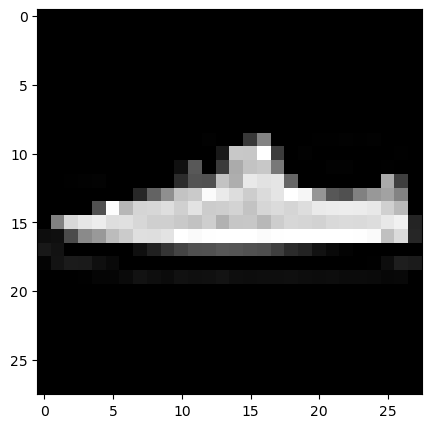

In [49]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 60, 60, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted item is: {class_names[prediction]}")
print(f"actual item is: {class_names[np.argmax(onehot_test_y[i])]}")
plt.figure(figsize=(5, 5))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [52]:
net.train(flat_train_X,onehot_train_y)

Starting Cost = 1.2226368776384238
1-Epoch Cost = 0.11834579622231102
2-Epoch Cost = 0.105825589618029
3-Epoch Cost = 0.09878893779972582
4-Epoch Cost = 0.09459284487379094


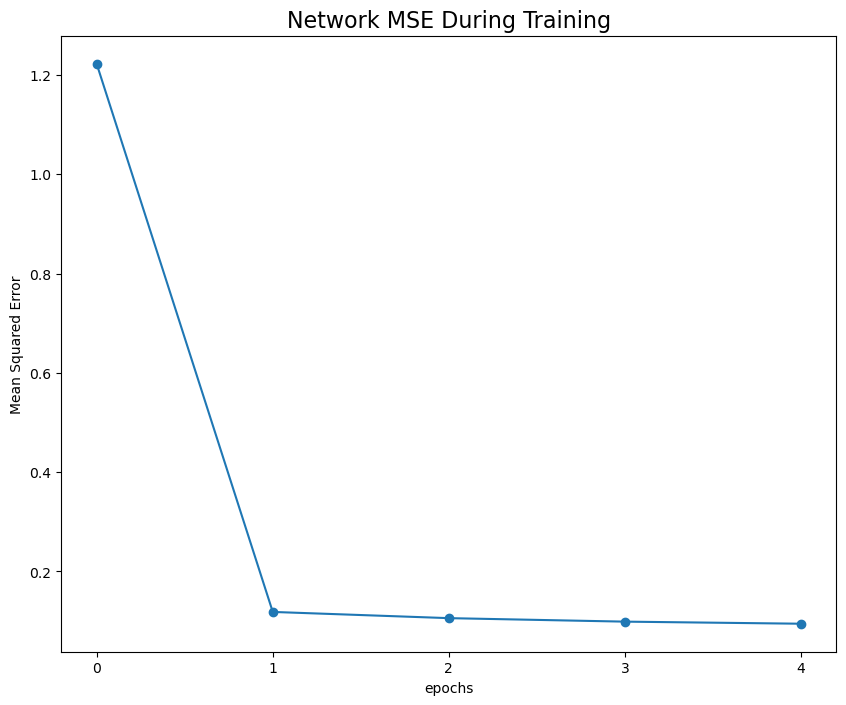

In [53]:
# Visualize the mean squared error over the training process 
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()

predicted item is: T-shirt/top
actual item is: T-shirt/top


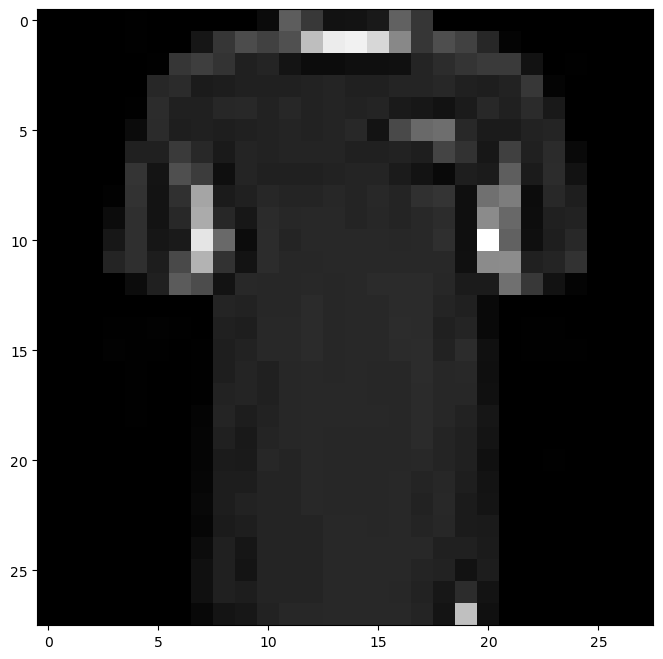

In [54]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted item is: {class_names[prediction]}")
print(f"actual item is: {class_names[np.argmax(onehot_test_y[i])]}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted item is: Bag
actual item is: Bag


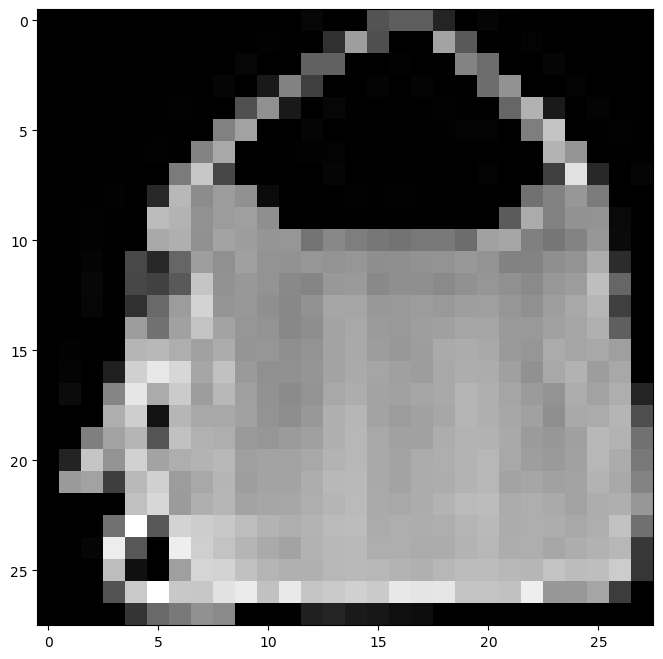

In [118]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted item is: {class_names[prediction]}")
print(f"actual item is: {class_names[np.argmax(onehot_test_y[i])]}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [79]:
# classification error
sum([int(net.predict(x)==y) for x, y in zip(flat_test_X, test_y)])/len(test_y)

0.8528